This project analyses some Facebook Ad_data using regression analysis. Each row is an advertising campaign that ran on Facebook. The columns are the results of that campaign. This is typical advertising engagement reporting data.  I have used multiple regression for this partcular exercise. 

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd 
df=pd.read_csv('/content/gdrive/My Drive/Academics/Sem 3/DAD/Travel Pony Facebook.csv')

1.  First we will remove rows that have 0 amount spend. These are campaigns that never ran and can potentially ruin our results. 

In [0]:
#Filter all the rows where the amount spend (USD)
# is greater than 0
#Then create a new data frame for this 

df_filtered = df[df['Amount Spent (USD)']>0]
print (df_filtered, type (df_filtered))




      Start Date  ... Cost per Page Engagement (USD)
0     2013-12-02  ...                       1.219512
1     2013-12-01  ...                       1.395349
2     2013-11-30  ...                       1.190476
3     2013-11-29  ...                       1.167315
4     2013-11-22  ...                       2.512857
...          ...  ...                            ...
3700  2013-06-11  ...                       1.050000
3701  2013-06-10  ...                       0.533333
3702  2013-06-09  ...                       0.990000
3703  2013-06-08  ...                       0.316667
3704  2013-06-07  ...                       0.000000

[1802 rows x 20 columns] <class 'pandas.core.frame.DataFrame'>


1a. Graphing a histogram of Amount Spent using Seaborn.  We often see that, we spend very little on ads. This follows what we call an exponential distribution. This means that a typical multiple regression is likely not to work well, unless dependent variables are also exponential in the same fashion.

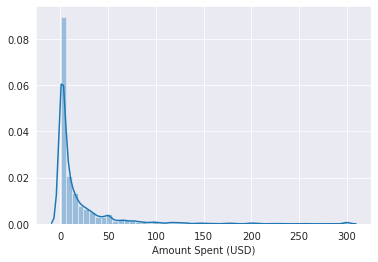

In [0]:
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(df_filtered['Amount Spent (USD)'])

1b. Creating scatter plots for spend and: reach, frequency, impressions and click.

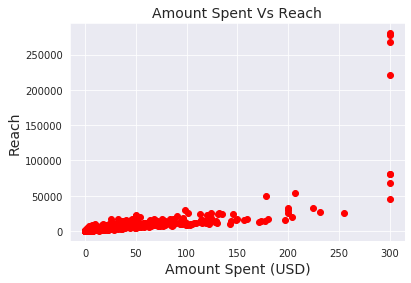

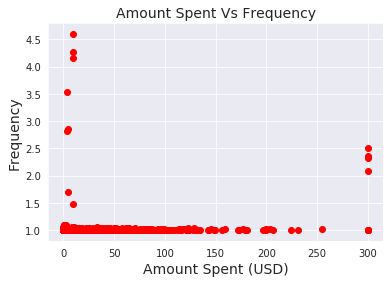

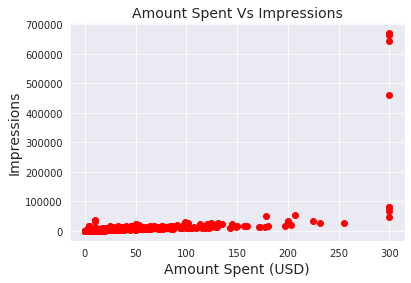

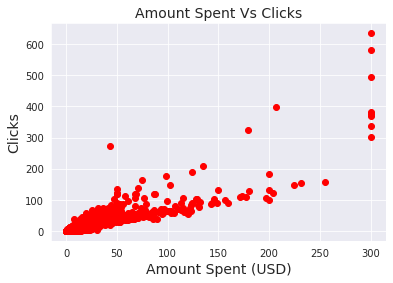

In [0]:
#Scatter Plot for Spend and Reach 
from pandas import DataFrame
import matplotlib.pyplot as plt


plt.scatter(df_filtered['Amount Spent (USD)'], df_filtered['Reach'], color='red')
plt.title('Amount Spent Vs Reach', fontsize=14)
plt.ylabel('Reach', fontsize=14)
plt.xlabel('Amount Spent (USD)', fontsize=14)
plt.grid(True)
plt.show()

##Scatter Plot for Spend and Frequency 
from pandas import DataFrame
import matplotlib.pyplot as plt


plt.scatter(df_filtered['Amount Spent (USD)'], df_filtered['Frequency'], color='red')
plt.title('Amount Spent Vs Frequency', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Amount Spent (USD)', fontsize=14)
plt.grid(True)
plt.show()

# Scatter Plot for Spend and Impressions
from pandas import DataFrame
import matplotlib.pyplot as plt


plt.scatter(df_filtered['Amount Spent (USD)'], df_filtered['Impressions'], color='red')
plt.title('Amount Spent Vs Impressions', fontsize=14)
plt.ylabel('Impressions', fontsize=14)
plt.xlabel('Amount Spent (USD)', fontsize=14)
plt.grid(True)
plt.show()

# Scatter Plot for Spend and click 

from pandas import DataFrame
import matplotlib.pyplot as plt


plt.scatter(df_filtered['Amount Spent (USD)'], df_filtered['Clicks'], color='red')
plt.title('Amount Spent Vs Clicks', fontsize=14)
plt.ylabel('Clicks', fontsize=14)
plt.xlabel('Amount Spent (USD)', fontsize=14)
plt.grid(True)
plt.show()



No there is no linear relationships between these variables. However between Amount Spent and Clicks there seems to be a little bit linearity.  No linear regression won't work for this problem. 

2. Build a multiple regression (Links to an external site.) where the outcome variable is Amount Spent and the predictor variables are: 

Campaign Name
Reach
Frequency
Impressions
Clicks
Unique Clicks
Page Likes
Page Engagement
Post Engagement
Post Likes
Post Comments
Post Shares
Photo Views
Website Clicks

In [0]:
# For nominal data (Campaign Name), create dummy variables using one hot encoding
dummy_integers_campaign_name_df = pd.get_dummies(df_filtered["Campaign Name"])


# Adding the campaign columns with dummy variables to the df_filtered
df_merged_with_campaign_names_as_columns = pd.merge(df_filtered, dummy_integers_campaign_name_df,
                                                    left_index=True, right_index=True)

# Using the above merged dataframe, we will do multiple regression using OLS
from pandas import DataFrame
import numpy
from sklearn import linear_model
import statsmodels.api as sm

# here we have a lot of predictor variables for multiple regression
# to predict "Amount Spent (USD)"
# following are the predictor variables
predictor_variables = ['Reach', 'Frequency', 'Impressions',
                       'Clicks', 'Unique Clicks', 'Page Likes',
                       'Page Engagement', 'Post Engagement', 'Post Likes',
                       'Post Comments', 'Post Shares', 'Photo Views',
                       'Website Clicks']
# Getting all column names of campaign
predictor_variables_campaign_names = dummy_integers_campaign_name_df.columns
all_predictor_variables = list(predictor_variables_campaign_names) + predictor_variables

X = df_merged_with_campaign_names_as_columns[all_predictor_variables]
Y = df_merged_with_campaign_names_as_columns['Amount Spent (USD)']
 
# with sklearn, training our model
regr = linear_model.LinearRegression()
regr.fit(X, Y)

# Creating a dataframe of coffecient and their names in descending order of coff
coeff_df = pd.DataFrame(regr.coef_, X.columns, columns=['Coefficient'])  
final_coeff_df_descinding_order = coeff_df.sort_values(by=['Coefficient'], ascending=False)

# Printing only 3 highest ranked coff
print(final_coeff_df_descinding_order[:3])




                                  Coefficient
TravelPony: Conversion Test         57.261579
Simple_Multi_Fill_Campaign_2_559    28.739434
Simple_Multi_Fill_Campaign_2_601    23.607804


The three predictors with the highest predictive value are  1. TravelPony: Conversion Test, 2.  Simple_Multi_Fill_Campaign_2_559 and 3. Simple_Multi_Fill_Campaign_2_601. 